# PCA
## Load libraries and utils functions

In [1]:
%matplotlib inline
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [2]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

## PCA for visualization: Hand-written digits
### Load data

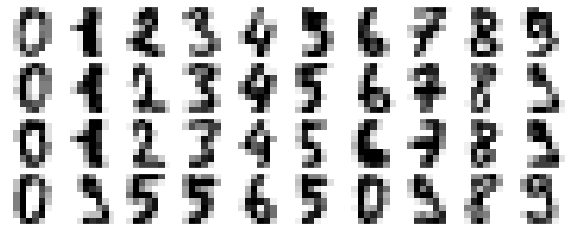

In [3]:
digits = load_digits()
plot_digits(digits.data)

### Transform data

In [4]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


### Data visualization

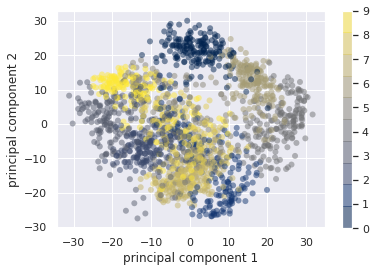

In [5]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('cividis', 10))
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.colorbar();

## Choosing the number of components

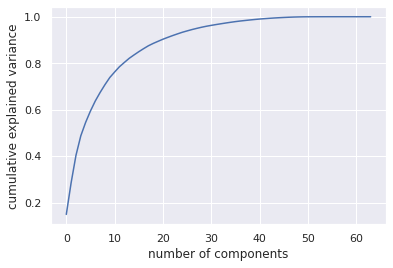

In [6]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## PCA as Noise Filtering

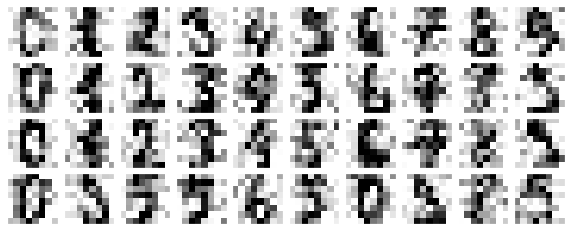

In [7]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [8]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

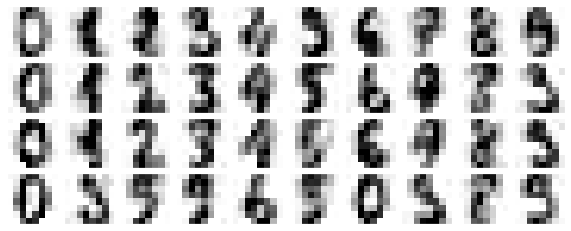

In [9]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## PCA as a compression algorithm

426.40 KB


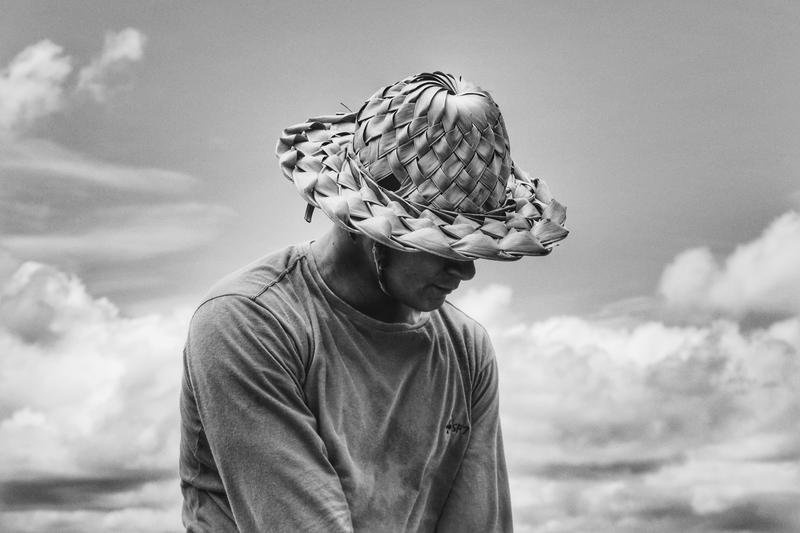

In [10]:
image = Image.open('images/oarsman.jpeg')          # read image (oarsman at https://omadson.github.io/photos/)
image = ImageOps.grayscale(image)
N, M = image.size                                  # get the number of columns (N) and rows (M)
print(f'{N*M/1000:.2f} KB')
image                                              # show resized image

In [11]:
X = np.asarray(image)                              # convert a PIL image to np array
pca = PCA(0.99).fit(X)
pca.n_components_

125

In [12]:
components = pca.transform(X)
filtered = pca.inverse_transform(components)

In [13]:
M1, N1 = components.shape
print(f'{N1*M1/1000:.2f} KB')

66.62 KB


In [14]:
clean_image = filtered.astype('uint8').reshape((M, N))

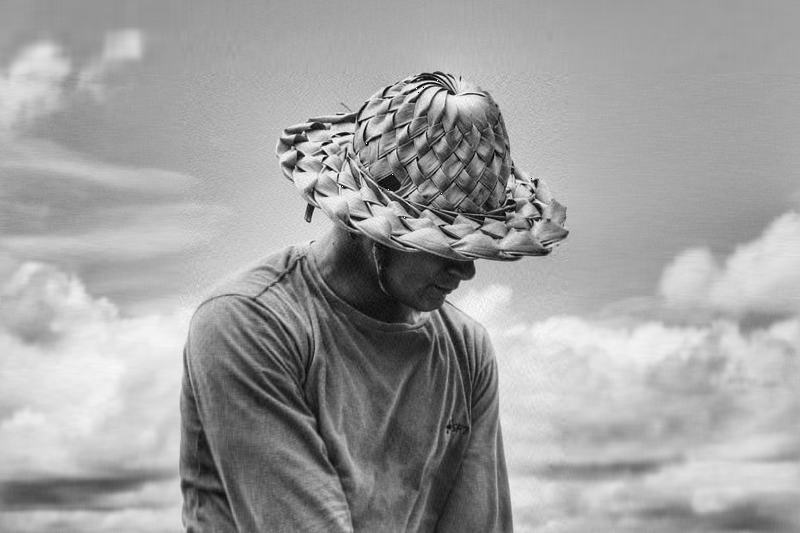

In [15]:
quatized_image = Image.fromarray(np.uint8(clean_image))   # convert array into a PIL image object
quatized_image